# Credit Punctuation Model 

Developed by: Emiliano Mena González.

University: Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO).

Degree: Finanacial Engineer.

Semester: 10th.

Date: 20/02/2024

In [1]:
# Libraries and dependencies
import main as m

## Introduction
### Main objective
The main objective of this project is to create a Personal Credit Punctuation Model that classify every new record on one of three possible scores(Poor, Standard or Good).
### Data
The data we are taking to do the model is the dataset contained in the csv file called "train.csv", this dataset has 28 columns (variables) and 100,000 rows (records). The last column of the dataset is the Credit_Score variable that will be the reference point to see the accuracy of the model. Below we have the first 5 record of the dataset to see what variables we have, what type of value they are.

In [2]:
m.df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


To see more clearly the type of data we will work with we have a little dataset that has some valious information to know what proccesses we will need to do in order to clean the data. The info we have is first of all the type of data, if they are null values, the present values and the unique values.

In [3]:
m.data_info

,Type,NA_values,Present_values,Unique_values
Variable_name,,,,
ID,object,0,100000,100000
Customer_ID,object,0,100000,12500
Month,object,0,100000,8
Name,object,9985,90015,10139
Age,object,0,100000,1788
SSN,object,0,100000,12501
Occupation,object,0,100000,16
Annual_Income,object,0,100000,18940
Monthly_Inhand_Salary,float64,15002,84998,13235


### Data cleaning
#### Delete the data it won´t be used
To start with the data cleaning, first we delete the data that won´t be used on the creation of the punctuation model. The data deleted is:

- ID: It is only a descriptive variable of the person who is being punctuated.
- Month: The model is the same in every moment of the year so it doesn´t matter the month of the record evaluated.
- Age: The age doesn´t has a correlation with the final score.
- SSN: Is another descriptive variable of the person.
- Occupation: It doesn´t matter on what the person evaluated works.
- Num_Bank_Accounts: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Num_Credit_Card: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Num_of_Loan: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Type_of_Loan: This info is not necessary considering the dataset has already a Credit_Mix variable.
- Payment_of_Min_Amount: There are more relevant variables of payment.
- Payment_Behaviour: There are more relevant variables of payment.

#### Null values
After deleting the variables that doesn´t have relevance on the model, the next step is to fill the null values. After seeing the variables that have null values, we separate them in two groups. The first group are the variables that can be filled with the values of other records from the same person, to do this we consider the Customer_ID to assign the same values. The second group are the variables that need to be filled with 0, this is because are variables that change on every record and are considered as 0. Below we can see a table that shows which variables are going on both fill methods.

|Filled with customer info|Filled with 0          |
|-------------------------|-----------------------|
|Name                     |Num_of_Delayed_Payment |
|Annual_Income            |Num_Credit_Inquiries   |
|Monthly_Inhand_Salary    |Amount_invested_monthly|
|Interest_Rate            |Monthly_Balance        |
|Credit_Mix               |                       |
|Credit_History_Age       |                       |

#### Numeric values
Now that we have a dataset with all the present values we are only missing to assign the correct format to every variable. The data has multiple variables that are numbers but of string type, to be able to be used the number variables we need to changed them to a numerical type, in this case float. This variables are: 

- Annual_Income 
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance

#### Change age format
Finally to end the data cleaning proccess we need to change the Credit_History_Age variable format from "NN Years and NN Months" to only the number of months. Now we can see the data cleaned and ready to be used on the model creation.

In [4]:
m.df2.head(5)

,Customer_ID,Name,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,3,7.0,11.27,4.0,Good,809.98,26.822620,271,49.574949,80.415295,312.494089,Good
1,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,-1,0.0,11.27,4.0,Good,809.98,31.944960,271,49.574949,118.280222,284.629162,Good
2,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,3,7.0,0.00,4.0,Good,809.98,28.609352,271,49.574949,81.699521,331.209863,Good
3,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,5,4.0,6.27,4.0,Good,809.98,31.377862,271,49.574949,199.458074,223.451310,Good
4,CUS_0xd40,Aaron Maashoh,19114.12,1824.843333,3.0,6,0.0,11.27,4.0,Good,809.98,24.797347,271,49.574949,41.420153,341.489231,Good


## Model
### Model bases
The developed credit punctuation model is a traditional one that takes it principal inspiration on the FICO model, there are multiple traditional models (FICO, Vantage, Credit Karma, Equifax, etc.) but we selected the FICO as a base because it´s the most used on the United States and multiple other models are based on this one. So to select the variables and the percentage of the final score they will have we looked on the FICO model pillars:

1. Payment history: essentially how frequently a borrower makes payments on time. Accounts for missed or late payments.
2. Amounts owed: how much a borrower owes, includes credit card balances, loans, and mortgages.
3. Credit history: how long a borrower has had credit accounts. Including age of their oldest account and the average age of all their accounts.
4. Credit mix: examines types of credit accounts a borrower has—credit cards, loans, and mortgages.
5. New credit: evaluates the number of recently opened credit accounts and credit applications. 
Also looks at the borrower’s overall credit history.

It is not known for sure how they are weighted every one of this pillars on the final score of the model, but lot of sources say that the distribution is the next:

|Pillar                  |Percentage|
|------------------------|----------|
|Payment history         |35%       |
|Amounts owed            |30%       |
|Length of credit history|15%       |
|Credit mix              |10%       |
|New credit              |10%       |

We add a sixth pillar to our model, this pillar is the Credit utilization. It is important because if a person is using properly his credit line it could be increased and vice versa. Below we can see the final conformation of the pillars and the variables selected for the model structure:

|**Pillar**             |**Percentage**|**Variables**           |
|:---------------------:|:------------:|:----------------------:|
|Payment history        |15%           |Delay_from_due_date     |
|Payment history        |15%           |Num_of_Delayed_Payment  |
|Amounts owed           |25%           |Outstanding_Debt        |
|Lengh of credit history|15%           |Credit_History_Age      |
|Credit mix             |10%           |Credit_Mix              |  
|New credit             |5%            |Changed_Credit_Limit    |
|New credit             |5%            |Num_Credit_Inquiries    |
|Credit utilization     |10%           |Credit_Utilization_Ratio|

In [5]:
m.results

,Customer_ID,Name,Model_Punctuation,Model_Score,Original_Score
0,CUS_0xd40,Aaron Maashoh,930,Good,Good
1,CUS_0xd40,Aaron Maashoh,960,Good,Good
2,CUS_0xd40,Aaron Maashoh,930,Good,Good
3,CUS_0xd40,Aaron Maashoh,880,Good,Good
4,CUS_0xd40,Aaron Maashoh,910,Good,Good
...,...,...,...,...,...
99995,CUS_0x942c,Nicks,830,Good,Poor
99996,CUS_0x942c,Nicks,830,Good,Poor
99997,CUS_0x942c,Nicks,830,Good,Poor
99998,CUS_0x942c,Nicks,860,Good,Standard


In [6]:
m.accuracy

0.62584

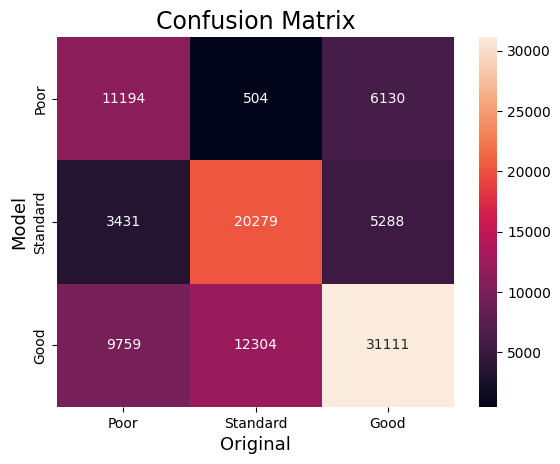

In [7]:
from visualizations import graph1;

## Conclusions